In [1]:

import sys
sys.path.append('..')
from Controllers.FLController import *
from Controllers.ILQGController import *
from Controllers.LQGController import *

(np.float64(-39.72813469028709),
 np.float64(17.606101651918433),
 np.float64(-60.59765234700281),
 np.float64(67.84199097765959))

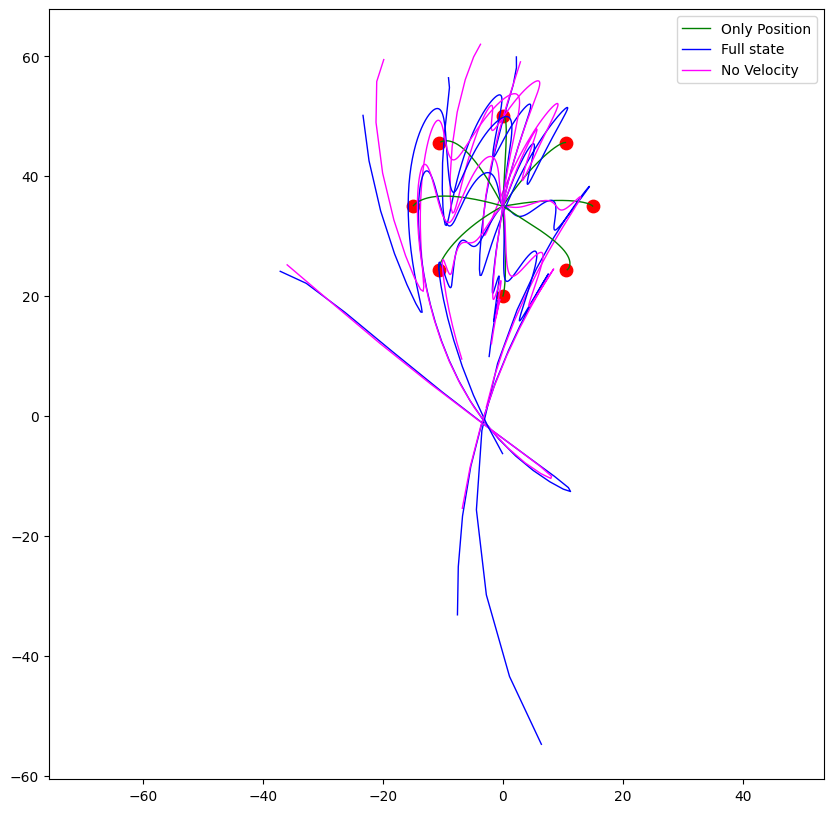

In [2]:
fig = plt.figure(figsize = (10,10))
for angles in np.linspace(0,2*pi,9)[:-1] :
    tg = [cos(angles)*15,35+sin(angles)*15]
    #x,y,u,z=BestLQG(Duration=.6,Num_iter=30,w1=1e8,w2 = 1e8,starting_point=[0,40],targets=tg,MultipleLinearization=True,plot = False,Activate_Noise=True)
    #plt.plot(x,y,color = "red")
    x,y,u,z=BestLQG(Duration=.6,Num_iter=300,starting_point=[0,35],targets=tg,plot = False,filter = [1,0,0,1,0,0])
    plt.plot(x,y,color = "green",linewidth =1,label = "Only Position")
    x,y,u,z=BestLQG(Duration=.6,Num_iter=300,starting_point=[0,35],targets=tg,plot = False,filter = [1,1,1,1,1,1])
    plt.plot(x,y,color = "blue",linewidth =1,label = "Full state")
    x,y,u,z=BestLQG(Duration=.6,Num_iter=300,starting_point=[0,35],targets=tg,plot = False,filter = [1,0,1,1,0,1])
    plt.plot(x,y,color = "magenta",linewidth =1,label = "No Velocity")
    x,y,u,z=BestLQG(Duration=.6,Num_iter=300,starting_point=[0,35],targets=tg,plot = False,filter = [1,0,1,1,0,1])
    #plt.plot(x,y,color = "#89CFF0",linewidth =1,label = "No Torques")
    plt.scatter([tg[0]],[tg[1]],s = 80,color = "red")
    if angles == 0: plt.legend()
plt.axis("equal")

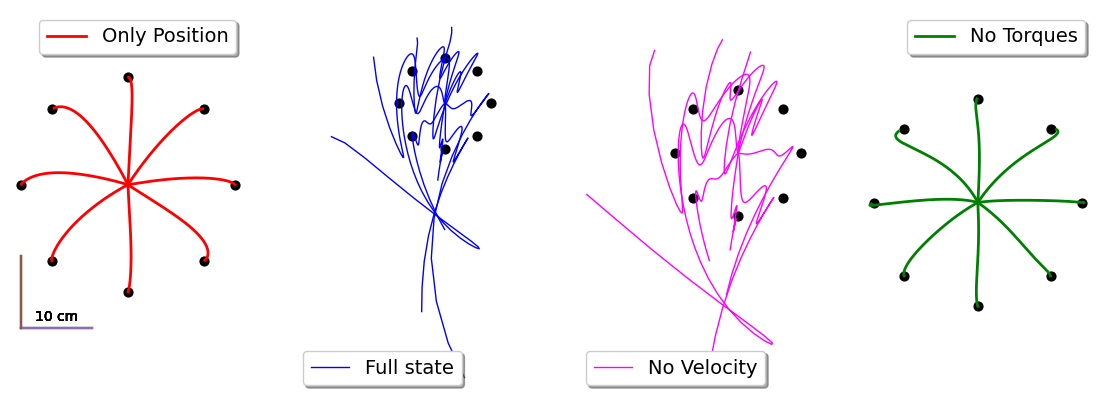

In [4]:
plt.subplots(1,4,figsize = (14,5))
for angles in np.linspace(0,2*pi,9)[:-1] :
    tg = [cos(angles)*15,35+sin(angles)*15]
    #x,y,u,z=BestLQG(Duration=.6,Num_iter=30,w1=1e8,w2 = 1e8,starting_point=[0,40],targets=tg,MultipleLinearization=True,plot = False,Activate_Noise=True)
    #plt.plot(x,y,color = "red")
    ax = plt.subplot(1,4,1)
    x,y,u,z=BestLQG(Duration=.6,Num_iter=300,starting_point=[0,35],targets=tg,plot = False,filter = [1,0,0,1,0,0])
    plt.plot(x,y,color = "red",linewidth =2,label = "Only Position")
    plt.scatter([tg[0]],[tg[1]],s = 40,color = "black")
    plt.plot(np.linspace(-15,-5,100),np.ones(100)*15)
    plt.plot(np.ones(100)*-15,np.linspace(15,25,100))
    plt.text(-13,16,"10 cm",fontsize = 10)
    if angles == 0: 
        plt.legend(frameon = True,shadow = True,fancybox = True,fontsize = 14)
        plt.axis("equal")
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax=plt.subplot(1,4,2)
    x,y,u,z=BestLQG(Duration=.6,Num_iter=300,starting_point=[0,35],targets=tg,plot = False,filter = [1,1,1,1,1,1])
    plt.plot(x,y,color = "blue",linewidth =1,label = "Full state")
    plt.scatter([tg[0]],[tg[1]],s = 40,color = "black")
    if angles == 0: 
        plt.legend(frameon = True,shadow = True,fancybox = True,fontsize = 14)
        plt.axis("equal")
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax=plt.subplot(1,4,3)
    x,y,u,z=BestLQG(Duration=.6,Num_iter=300,starting_point=[0,35],targets=tg,plot = False,filter = [1,0,1,1,0,1])
    plt.plot(x,y,color = "magenta",linewidth =1,label = "No Velocity")
    plt.scatter([tg[0]],[tg[1]],s = 40,color = "black")
    if angles == 0: 
        plt.legend(frameon = True,shadow = True,fancybox = True,fontsize = 14)
        plt.axis("equal")
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax = plt.subplot(1,4,4)
    x,y,u,z=BestLQG(Duration=.6,Num_iter=300,starting_point=[0,35],targets=tg,plot = False,filter = [1,1,0,1,1,0])
    plt.plot(x,y,color = "green",linewidth =2,label = "No Torques")
    plt.scatter([tg[0]],[tg[1]],s = 40,color = "black")
    if angles == 0: 
        plt.legend(frameon = True,shadow = True,fancybox = True,fontsize = 14)
        plt.axis("equal")
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

#plt.savefig("img/8TargComparison.png",dpi = 400)

In [3]:
def Rearrange_state(x):
    return np.array([x[0],x[2],x[4],x[1],x[3],x[5],x[6],x[7]])
def Cost_Function(w1,w2,r,z,u,rearrange = False,targetpenalty = True):
    if len(z) != 8 : raise ValueError 
    if rearrange : z = Rearrange_state(z)
    R = np.array([[r,0],[0,r]])
    Q = np.array([[w1,0,0,0,0,0,-w1,0],[0,w2,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],
               [0,0,0,w1,0,0,0,-w1],[0,0,0,0,w2,0,0,0],[0,0,0,0,0,0,0,0],
               [-w1,0,0,0,0,0,w1,0],[0,0,0,-w1,0,0,0,w1]])
    J = 0
    for i in range(u.shape[0]):
        J+= u[i].T@R@u[i]
    if targetpenalty : J+=z.T@Q@z
    return int(J*1000)/1000
def toPolar(targets):
    obj1,obj2 = newton(fnewton,dfnewton,1e-8,1000,targets[0],targets[1])
    return np.array([obj1,obj2])


In [4]:
from Controllers.ILQGController import *
from Controllers.FLController import *
from matplotlib.patches import Ellipse
st = ToCartesian(np.array([70,70])/180*pi)
tg = ToCartesian(np.array([-10,100])/180*pi)
MovementTime = .6
NumIteration = int(MovementTime*100)
Time = np.linspace(0,MovementTime*1000,NumIteration)
plt.figure(figsize = (8,8))

xFL,yFL,jFL,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,ShowJ=True,plot = False,Delay = .06,Activate_Noise=True)
xILQG,yILQG,uilqg,zilqg=ILQG(MovementTime,1e4,1,1e-5,tg,NumIteration,st,plot = False,Delay = .06,Noise=True)
xLQG,yLQG,ulqg,zlqg=BestLQG(Duration=MovementTime,Num_iter=120,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=True)

jILQG = Cost_Function(1e7,1e3,1e-5,np.concatenate((zilqg[-1,:6],toPolar(tg))),uilqg,rearrange=True)
jLQG = Cost_Function(1e7,1e3,1e-5,zlqg[:,-1],ulqg)
jFL = int(jFL*1000)/1000

plt.plot(xFL,yFL,color = "blue",label = "Feedback \nLinearization",linewidth = 3)
plt.plot(xILQG,yILQG,color = "green",label = "ILQG",linewidth = 3)
plt.plot(xLQG,yLQG,color = "orange",label = "LQG",linewidth = 3)
plt.axis("equal")
plt.yticks([20,40,60])
plt.xticks([-20,0,20])
plt.scatter([30],[28],edgecolors='red', facecolors='none', s=100, linewidth=1.5)
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.plot([-10,0],[30,30],color = "black",linewidth = 2)
plt.text(-8,31,"10cm",fontsize = 20)
MultipleLabel(title="")
plt.show()

fig,ax = plt.subplots(1,3,figsize = (10,6))
Decal = 15
ft = 20

ax[0].plot(Time,xfl[:,2]/pi*180,label="Shoulder",linewidth = 3,color = "blue")
ax[1].plot(np.linspace(0,MovementTime*1000,120),zlqg[1]/pi*180,label = "Shoulder",linewidth = 3,color = "orange")
ax[2].plot(Time,zilqg[:,2]/pi*180,label = "Shoulder",linewidth = 3,color = "green")



ax[0].text(300,(xfl[:,2]/pi*180)[len(xfl[:,2])//2]+Decal,"S",color = "blue",fontsize = ft)
ax[1].text(300,(zlqg[1]/pi*180)[len(zlqg[1])//2]+Decal,"S",color = "orange",fontsize = ft)
ax[2].text(300,(zilqg[:,2]/pi*180)[len(zilqg[:,2])//2]+Decal,"S",color = "green",fontsize = ft)

ax[0].text(300,(xfl[:,3]/pi*180)[len(xfl[:,3])//2]+Decal,"E",color = "blue",fontsize = ft)
ax[1].text(300,(zlqg[4]/pi*180)[len(zlqg[4])//2]+Decal,"E",color = "orange",fontsize = ft)
ax[2].text(300,(zilqg[:,3]/pi*180)[len(zilqg[:,3])//2]+Decal,"E",color = "green",fontsize = ft)
ft = 20
ax[0].set_title("FL",fontsize = ft,fontweight = "bold",style = "italic")
ax[1].set_title("LQG",fontsize = ft,fontweight = "bold",style = "italic")
ax[2].set_title("ILQG",fontsize = ft,fontweight = "bold",style = "italic")





ax[0].plot(Time,xfl[:,3]/pi*180,label="Elbow",linewidth = 3,color = "blue",linestyle = "-.")
ax[1].plot(np.linspace(0,MovementTime*1000,120),zlqg[4]/pi*180,label = "Elbow",linewidth = 3,color = "orange",linestyle = "-.")
ax[2].plot(Time,zilqg[:,3]/pi*180,label = "Elbow",linewidth = 3,color = "green",linestyle = "-.")
ax[0].set_ylabel("Angular Velocity [deg/sec]",fontsize = 18)
for k in range(3):
    ax[k].spines['top'].set_visible(False)
    ax[k].spines['right'].set_visible(False)
    ax[k].tick_params(axis='both', labelsize=18)
    ax[k].set_xlabel("Time [ms]",fontsize = 18)
    ax[k].plot(Time,np.zeros(len(Time)),color = "grey",linestyle = "--")
    ax[k].set_yticks([-200,-100,0,100])
    ax[k].set_ylim(-250,200)
    ax[k].set_xticks([0,MovementTime*1000])

plt.subplots_adjust(wspace=0.4,hspace = 0.3)
#MultipleLabel(title = "")

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

<Figure size 800x800 with 0 Axes>

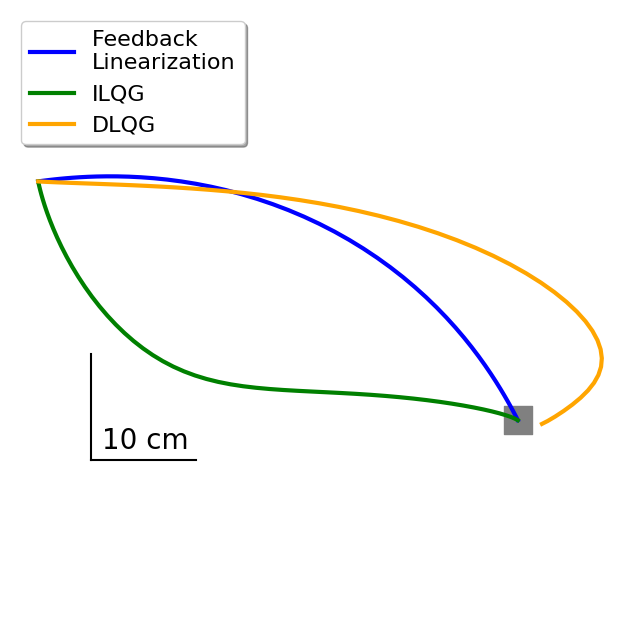

In [ ]:

from matplotlib.patches import Ellipse
st = ToCartesian(np.array([70,70])*pi/180)
tg = ToCartesian(np.array([-12,100])*pi/180)
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
xFL,yFL,j,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,ShowJ=True,plot = False,Delay = 0,Activate_Noise=False)
xILQG,yILQG,u,zilqg=ILQG(MovementTime,1e4,1,1,tg,NumIteration,st,plot = False,Delay = 0,Noise=False)
xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=False)
plt.plot(xFL,yFL,color = "blue",label = "Feedback \nLinearization",linewidth = 3)
plt.plot(xILQG,yILQG,color = "green",label = "ILQG",linewidth = 3)
plt.plot(xLQG,yLQG,color = "orange",label = "DLQG",linewidth = 3)
plt.axis("equal")
plt.yticks([20,40,60])
plt.xticks([-20,0,20])
plt.scatter([tg[0]],[tg[1]],marker = "s",s = 400,color = "grey")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
add_scale_cm(-10,23,10,fontsize =20)
MultipleLabel(title="",side = "upper left")
plt.savefig("Long.png",dpi = 200)

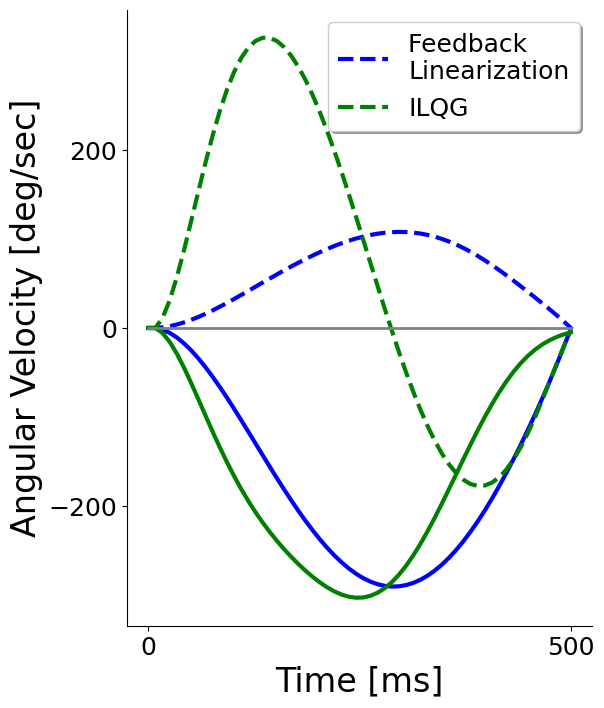

In [5]:

from matplotlib.patches import Ellipse
st = ToCartesian(np.array([70,70])*pi/180)
tg = ToCartesian(np.array([-12,100])*pi/180)
MovementTime = .5
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (6,8))
xFL,yFL,j,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,ShowJ=True,plot = False,Delay = 0,Activate_Noise=False)
xILQG,yILQG,u,zilqg=ILQG(MovementTime,1e4,1,.1,tg,NumIteration,st,plot = False,Delay = 0,Noise=False)
xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=False,r1 = 1e-3,r2 = 1e-3)
plt.plot(Time,xfl[:,2]*180/pi,color = "blue",label = "Feedback \nLinearization",linewidth = 3)
plt.plot(Time,zilqg[:,2]*180/pi,color = "green",label = "ILQG",linewidth = 3)

plt.plot(Time,xfl[:,3]*180/pi,color = "blue",label = "Feedback \nLinearization",linewidth = 3,linestyle = "--")
plt.plot(Time,zilqg[:,3]*180/pi,color = "green",label = "ILQG",linewidth = 3,linestyle = "--")
plt.plot(Time,np.zeros(len(Time)),color = "grey",linewidth = 2)
MultipleLabel(title="",side = "upper right",fontsize =18)
plt.yticks([-200,0,200],fontsize = 18)
plt.xticks([0,500],fontsize = 18)
ax = plt.gca()
plt.ylabel("Angular Velocity [deg/sec]",fontsize = 24)
plt.xlabel("Time [ms]",fontsize = 24)
delete_axis(ax,sides = ["right","top"])
plt.savefig("VelHogan.png",dpi = 200)
plt.show()

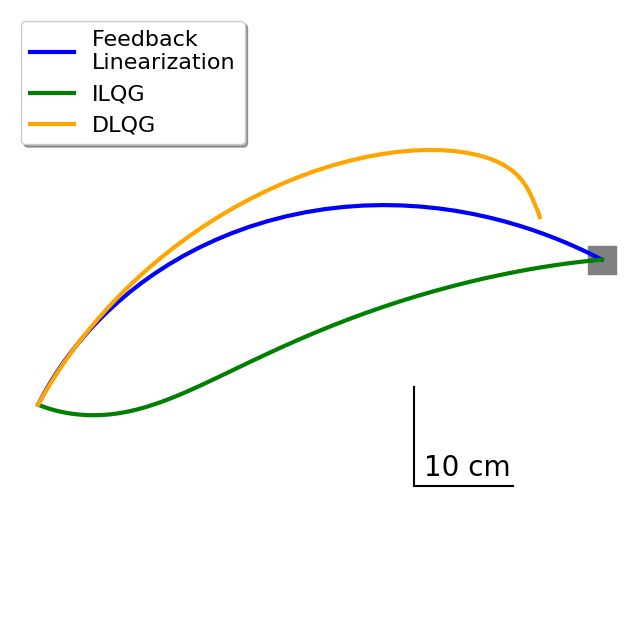

In [6]:

from matplotlib.patches import Ellipse
st = ToCartesian(np.array([70,110])*pi/180)
tg = ToCartesian(np.array([20,60])*pi/180)
MovementTime = .5
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
xFL,yFL,j,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,ShowJ=True,plot = False,Delay = 0,Activate_Noise=False)
xILQG,yILQG,u,zilqg=ILQG(MovementTime,1e4,1,1e-5,tg,NumIteration,st,plot = False,Delay = 0,Noise=False)
xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=False)
plt.plot(xFL,yFL,color = "blue",label = "Feedback \nLinearization",linewidth = 3)
plt.plot(xILQG,yILQG,color = "green",label = "ILQG",linewidth = 3)
plt.plot(xLQG,yLQG,color = "orange",label = "DLQG",linewidth = 3)
plt.axis("equal")
plt.yticks([20,40,60])
plt.xticks([-20,0,20])
plt.scatter([tg[0]],[tg[1]],marker = "s",s = 400,color = "grey")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
add_scale_cm(15,20,10,fontsize =20)
MultipleLabel(title="",side = "upper left")
plt.savefig("Long.png",dpi = 200)
plt.show()

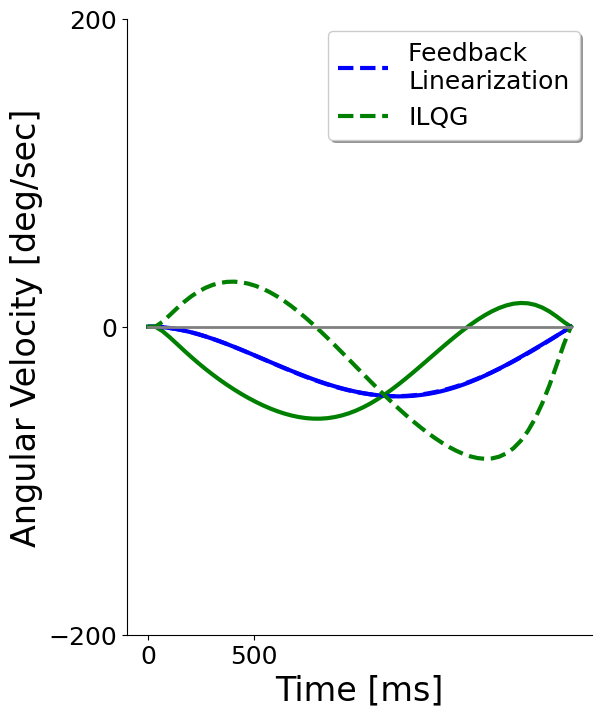

In [7]:

from matplotlib.patches import Ellipse
st = ToCartesian(np.array([70,110])*pi/180)
tg = ToCartesian(np.array([20,60])*pi/180)
MovementTime = 2
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (6,8))
xFL,yFL,j,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,ShowJ=True,plot = False,Delay = 0,Activate_Noise=False)
xILQG,yILQG,u,zilqg=ILQG(MovementTime,1e4,1,1e-5,tg,NumIteration,st,plot = False,Delay = 0,Noise=False)
xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=False,r1 = 1e-3,r2 = 1e-3)
plt.plot(Time,xfl[:,2]*180/pi,color = "blue",label = "Feedback \nLinearization",linewidth = 3)
plt.plot(Time,zilqg[:,2]*180/pi,color = "green",label = "ILQG",linewidth = 3)

plt.plot(Time,xfl[:,3]*180/pi,color = "blue",label = "Feedback \nLinearization",linewidth = 3,linestyle = "--")
plt.plot(Time,zilqg[:,3]*180/pi,color = "green",label = "ILQG",linewidth = 3,linestyle = "--")
plt.plot(Time,np.zeros(len(Time)),color = "grey",linewidth = 2)
MultipleLabel(title="",side = "upper right",fontsize =18)
plt.yticks([-200,0,200],fontsize = 18)
plt.xticks([0,500],fontsize = 18)
ax = plt.gca()
plt.ylabel("Angular Velocity [deg/sec]",fontsize = 24)
plt.xlabel("Time [ms]",fontsize = 24)
delete_axis(ax,sides = ["right","top"])
plt.savefig("VelHogan.png",dpi = 200)
plt.show()

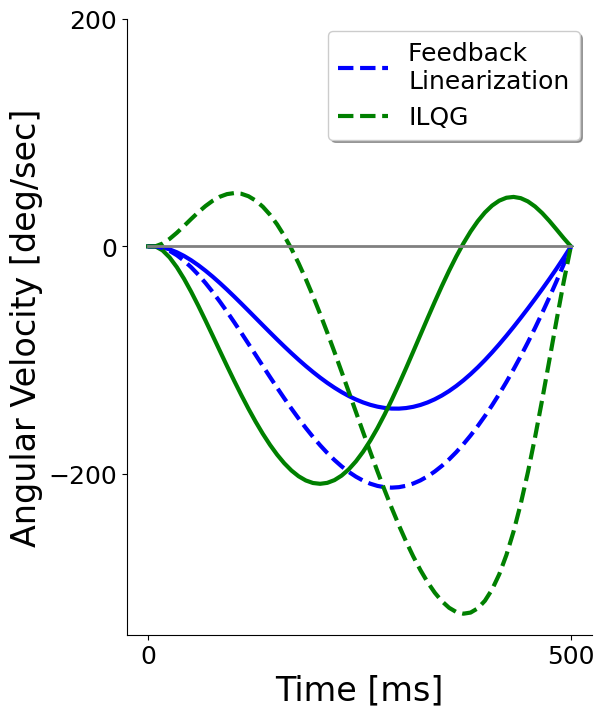

In [8]:

from matplotlib.patches import Ellipse
st = ToCartesian(np.array([70,120])*pi/180)
tg = ToCartesian(np.array([30,60])*pi/180)
MovementTime = .5
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (6,8))
xFL,yFL,j,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,ShowJ=True,plot = False,Delay = 0,Activate_Noise=False)
xILQG,yILQG,u,zilqg=ILQG(MovementTime,1e4,1,1e-5,tg,NumIteration,st,plot = False,Delay = 0,Noise=False)
xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=False,r1 = 1e-3,r2 = 1e-3)
plt.plot(Time,xfl[:,2]*180/pi,color = "blue",label = "Feedback \nLinearization",linewidth = 3)
plt.plot(Time,zilqg[:,2]*180/pi,color = "green",label = "ILQG",linewidth = 3)

plt.plot(Time,xfl[:,3]*180/pi,color = "blue",label = "Feedback \nLinearization",linewidth = 3,linestyle = "--")
plt.plot(Time,zilqg[:,3]*180/pi,color = "green",label = "ILQG",linewidth = 3,linestyle = "--")
plt.plot(Time,np.zeros(len(Time)),color = "grey",linewidth = 2)
MultipleLabel(title="",side = "upper right",fontsize =18)
plt.yticks([-200,0,200],fontsize = 18)
plt.xticks([0,500],fontsize = 18)
ax = plt.gca()
plt.ylabel("Angular Velocity [deg/sec]",fontsize = 24)
plt.xlabel("Time [ms]",fontsize = 24)
delete_axis(ax,sides = ["right","top"])
plt.savefig("VelHogan.png",dpi = 200)
plt.show()

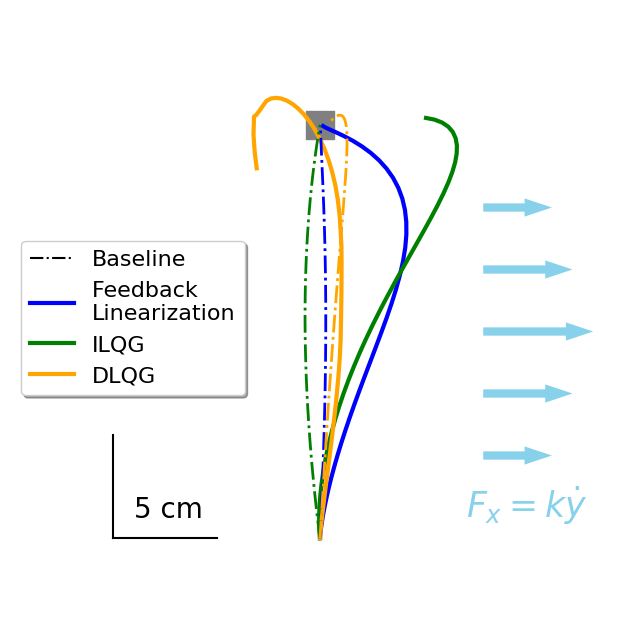

In [2]:

from matplotlib.patches import FancyArrow
st = [0,30]
tg = [0,50]
MovementTime = .5
NumIteration = int(MovementTime*100)
Time = np.linspace(0,MovementTime*1000,NumIteration)
side = "Right"
plt.figure(figsize = (8,8))
lw = [3,2]
ls = ["-","-."]
plt.plot([0,0],[30,30],color = "black",linestyle = "-.",label = "Baseline")
for i,activation in enumerate([True,False]):
    xFL,yFL,j,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,ShowJ=True,plot = False,AdditionalDynamics={"FF":activation,"FFonset":30,"Side":side,"Direction":"up"},Delay = .06,Activate_Noise=False)
    xILQG,yILQG,u,zilqg=ILQG(MovementTime,1e4,1,1e-5,tg,NumIteration,st,plot = False,Delay =0,Noise=False,FF=activation,Side=side,Feedback=True)
    xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=False,w4=1e3,r1=1e-5,r2=1e-5,AdditionalDynamics={"FF":activation,"FFonset":30,"Side":side,"Direction":"up"})
    plt.plot(xFL,yFL,color = "blue",label = "Feedback \nLinearization",linewidth = lw[i],linestyle = ls[i])
    plt.plot(xILQG,yILQG,color = "green",label = "ILQG",linewidth = lw[i],linestyle = ls[i])
    plt.plot(xLQG,yLQG,color = "orange",label = "DLQG",linewidth = lw[i],linestyle = ls[i])
    if i == 0: MultipleLabel(title="",side="center left")
plt.axis("equal")
plt.yticks([30,40,50])
plt.xticks([-10,0,10])
plt.xlim(-15,15)
plt.scatter([tg[0]],[tg[1]],color = "grey",marker = "s", s=400)
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
add_scale_cm(-10,30,5,fontsize = 20)

Y = [35,38,41,44,47]
DY = [2,3,4,3,2]
mycolor = "#87d1eb"
for i in range(5):
    arrow = FancyArrow(x=8, y=Y[i]-1, dx=DY[i], dy=0, width=0.2, edgecolor=mycolor, facecolor=mycolor, linewidth=3)
    ax.add_patch(arrow)
# Add the arrow to the plot



# Add the text above the arrow using LaTeX formatting
ax.text(10,31, r'$F_x = k\dot{y}$', fontsize=25, ha='center',color = mycolor, fontweight='bold')
plt.savefig("FFFinal.png",dpi = 200)
plt.show()


In [ ]:

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
def Cost_function(x,u,w1 = 1e4,w2 = 1,r = 1e-3):
    thetas,thetae,omegas,omegae,target1,target2 = x[-1]
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2 + w2*(omegas**2+omegae**2) + np.sum(u*u) * r
superscript_map = str.maketrans("-0123456789", "⁻⁰¹²³⁴⁵⁶⁷⁸⁹")

def format_sig_figs_superscript(x, sig=3):
    if x == 0:
        return "0 × 10⁰"
    
    exponent = int(floor(log10(abs(x))))
    mantissa = round(x / (10 ** exponent), sig - 1)
    superscript_exp = str(exponent).translate(superscript_map)
    
    return f"{mantissa} × 10{superscript_exp}"

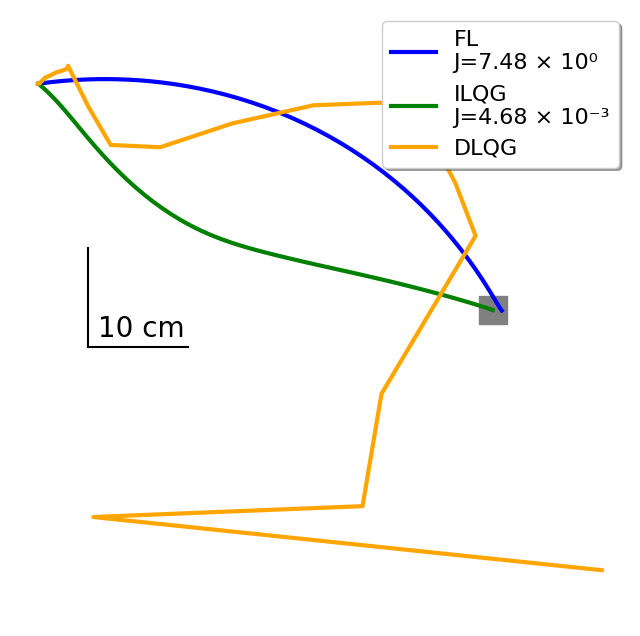

In [ ]:

from matplotlib.patches import Ellipse
st = ToCartesian(np.array([70,70])*pi/180)
tg = ToCartesian(np.array([-12,100])*pi/180)
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-7,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0,Activate_Noise=False)
xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,1e-3,tg,st,NumIteration,delay = 0,Noise=False)
xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = 1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0,Activate_Noise=False)

xilqg = np.zeros((NumIteration,6))
xilqg[:,:4] = zilqg 
xilqg[:,4],xilqg[:,5] = np.ones(NumIteration)*xfl[-1,4],np.ones(NumIteration)*xfl[-1,5]

JFL,JILQG,JDLQG = Cost_function(xfl,uFL),Cost_function(xilqg,uILQG),Cost_function(z.T,uDLQG)

plt.plot(xFL,yFL,color = "blue",label = "FL\nJ="+format_sig_figs_superscript(JFL),linewidth = 3)
plt.plot(xILQG,yILQG,color = "green",label = "ILQG\nJ="+format_sig_figs_superscript(JILQG),linewidth = 3)
plt.plot(xLQG,yLQG,color = "orange",label = "DLQG",linewidth = 3)
plt.axis("equal")
plt.yticks([20,40,60])
plt.xticks([-20,0,20])
plt.scatter([tg[0]],[tg[1]],marker = "s",s = 400,color = "grey")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
add_scale_cm(-10,23,10,fontsize =20)
MultipleLabel(title="",side = "upper right")
plt.savefig("Baseline_movement1.png",dpi = 200)






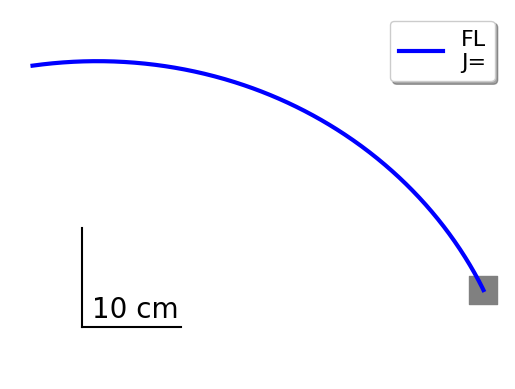

In [ ]:
st = ToCartesian(np.array([70,70])*pi/180)
tg = ToCartesian(np.array([-12,100])*pi/180)
xFL,yFL,xfl,uFL = FL_6muscles(Duration=.6,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-7,Num_iter=300,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=False)
plt.plot(xFL,yFL,color = "blue",label = "FL\nJ=",linewidth = 3)
plt.axis("equal")
plt.yticks([20,40,60])
plt.xticks([-20,0,20])
plt.scatter([tg[0]],[tg[1]],marker = "s",s = 400,color = "grey")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
add_scale_cm(-10,23,10,fontsize =20)
MultipleLabel(title="",side = "upper right")


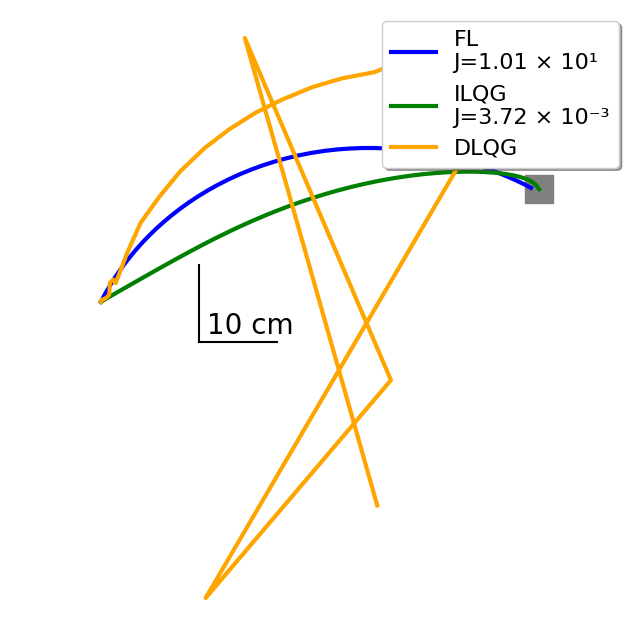

In [ ]:

from matplotlib.patches import Ellipse
st = ToCartesian(np.array([70,110])*pi/180)
tg = ToCartesian(np.array([20,60])*pi/180)
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-7,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0,Activate_Noise=False)
xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,1e-3,tg,st,NumIteration,delay = 0,Noise=False)
xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = 1e-3,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0,Activate_Noise=False)

xilqg = np.zeros((NumIteration,6))
xilqg[:,:4] = zilqg 
xilqg[:,4],xilqg[:,5] = np.ones(NumIteration)*xfl[-1,4],np.ones(NumIteration)*xfl[-1,5]

JFL,JILQG,JDLQG = Cost_function(xfl,uFL),Cost_function(xilqg,uILQG),Cost_function(z.T,uDLQG)

plt.plot(xFL,yFL,color = "blue",label = "FL\nJ="+format_sig_figs_superscript(JFL),linewidth = 3)
plt.plot(xILQG,yILQG,color = "green",label = "ILQG\nJ="+format_sig_figs_superscript(JILQG),linewidth = 3)
plt.plot(xLQG,yLQG,color = "orange",label = "DLQG",linewidth = 3)
plt.axis("equal")
plt.yticks([20,40,60])
plt.xticks([-20,0,20])
plt.scatter([tg[0]],[tg[1]],marker = "s",s = 400,color = "grey")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
add_scale_cm(-10,23,10,fontsize =20)
MultipleLabel(title="",side = "upper right")
plt.savefig("Baseline_movement2.png",dpi = 200)


Solution found at iteration  42
Solution found at iteration  29
Solution found at iteration  38
Solution found at iteration  56
Solution found at iteration  45
Solution found at iteration  25
Solution found at iteration  48
Solution found at iteration  57


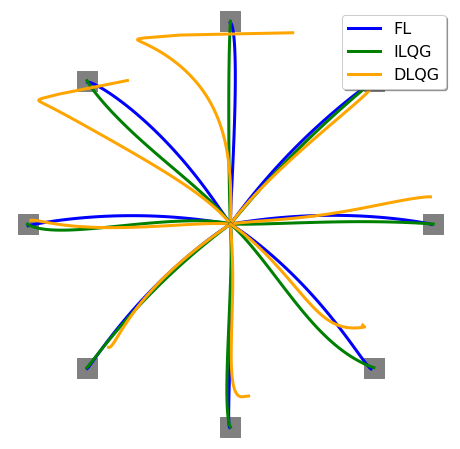

In [5]:

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
def Cost_function(x,u,w1 = 1e4,w2 = 1,r = 1e-3):
    thetas,thetae,omegas,omegae,target1,target2 = x[-1]
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2 + w2*(omegas**2+omegae**2) + np.sum(u*u) * r
superscript_map = str.maketrans("-0123456789", "⁻⁰¹²³⁴⁵⁶⁷⁸⁹")

def format_sig_figs_superscript(x, sig=3):
    if x == 0:
        return "0 × 10⁰"
    
    exponent = int(floor(log10(abs(x))))
    mantissa = round(x / (10 ** exponent), sig - 1)
    superscript_exp = str(exponent).translate(superscript_map)
    
    return f"{mantissa} × 10{superscript_exp}"
st = [0,30]
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [cos(angles)*10,30+sin(angles)*10]
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-7,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=False)
    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,1e-3,tg,st,NumIteration,delay = 0.06,Noise=False)
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = 1e-3,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=False)

    xilqg = np.zeros((NumIteration,6))
    xilqg[:,:4] = zilqg 
    xilqg[:,4],xilqg[:,5] = np.ones(NumIteration)*xfl[-1,4],np.ones(NumIteration)*xfl[-1,5]

    plt.plot(xFL,yFL,color = "blue",linewidth = 3,label= "FL")
    plt.plot(xILQG,yILQG,color = "green",linewidth = 3,label = "ILQG")
    plt.plot(xLQG,yLQG,color = "orange",linewidth = 3,label = "DLQG")
    plt.scatter([tg[0]],[tg[1]],marker = "s",s = 400,color = "grey")
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
MultipleLabel(title="",side = "upper right")
#plt.savefig("Centeroutv2.png",dpi = 200)


In [ ]:

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *

def Cost_function(x,u,w1 = 1e4,w2 = 1,r = 1e-3):
    thetas,thetae,omegas,omegae,target1,target2 = x[-1]
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2 + w2*(omegas**2+omegae**2) + np.sum(u*u) * r
superscript_map = str.maketrans("-0123456789", "⁻⁰¹²³⁴⁵⁶⁷⁸⁹")

def format_sig_figs_superscript(x, sig=3):
    if x == 0:
        return "0 × 10⁰"
    
    exponent = int(floor(log10(abs(x))))
    mantissa = round(x / (10 ** exponent), sig - 1)
    superscript_exp = str(exponent).translate(superscript_map)
    
    return f"{mantissa} × 10{superscript_exp}"
st = [0,30]
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [cos(angles)*10,30+sin(angles)*10]
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-7,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=False)
    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,1e-3,tg,st,NumIteration,delay = 0.06,Noise=False)
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = 1e-3,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=False)

    xilqg = np.zeros((NumIteration,6))
    xilqg[:,:4] = zilqg 
    xilqg[:,4],xilqg[:,5] = np.ones(NumIteration)*xfl[-1,4],np.ones(NumIteration)*xfl[-1,5]

    plt.plot(xFL,yFL,color = "blue",linewidth = 3,label= "FL")
    plt.plot(xILQG,yILQG,color = "green",linewidth = 3,label = "ILQG")
    plt.plot(xLQG,yLQG,color = "orange",linewidth = 3,label = "DLQG")
    plt.scatter([tg[0]],[tg[1]],marker = "s",s = 400,color = "grey")
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
MultipleLabel(title="",side = "upper right")
plt.savefig("Centeroutv2.png",dpi = 200)


d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:464: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:466: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:467: ComplexWarning: Casting complex values to real discards the imaginary pa

Solution found at iteration  42
Solution found at iteration  29
Solution found at iteration  38
Solution found at iteration  56
Solution found at iteration  45
Solution found at iteration  25
Solution found at iteration  48
Solution found at iteration  57


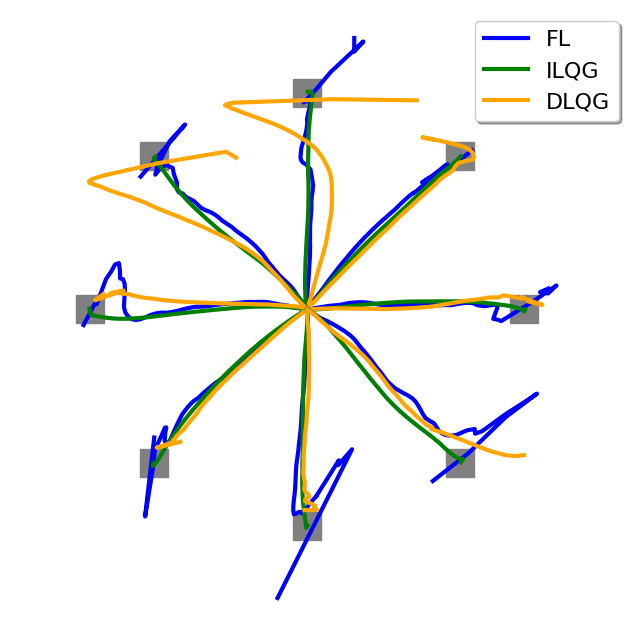

In [1]:

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
def Cost_function(x,u,w1 = 1e4,w2 = 1,r = 1e-3):
    thetas,thetae,omegas,omegae,target1,target2 = x[-1]
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2 + w2*(omegas**2+omegae**2) + np.sum(u*u) * r
superscript_map = str.maketrans("-0123456789", "⁻⁰¹²³⁴⁵⁶⁷⁸⁹")

def format_sig_figs_superscript(x, sig=3):
    if x == 0:
        return "0 × 10⁰"
    
    exponent = int(floor(log10(abs(x))))
    mantissa = round(x / (10 ** exponent), sig - 1)
    superscript_exp = str(exponent).translate(superscript_map)
    
    return f"{mantissa} × 10{superscript_exp}"
st = [0,30]
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [cos(angles)*10,30+sin(angles)*10]
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-7,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,1e-3,tg,st,NumIteration,delay = 0.06,Noise=True)
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = 1e-3,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)

    xilqg = np.zeros((NumIteration,6))
    xilqg[:,:4] = zilqg 
    xilqg[:,4],xilqg[:,5] = np.ones(NumIteration)*xfl[-1,4],np.ones(NumIteration)*xfl[-1,5]

    plt.plot(xFL,yFL,color = "blue",linewidth = 3,label= "FL")
    plt.plot(xILQG,yILQG,color = "green",linewidth = 3,label = "ILQG")
    plt.plot(xLQG,yLQG,color = "orange",linewidth = 3,label = "DLQG")
    plt.scatter([tg[0]],[tg[1]],marker = "s",s = 400,color = "grey")
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
MultipleLabel(title="",side = "upper right")

